In [61]:
# Main libraries usage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Sklearn libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error
from sklearn.compose import  ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import  Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline


In [6]:
world_happiness_report = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
world_happiness_report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
world_happiness_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
world_happiness_report.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
world_happiness_report['Country'].value_counts()[:10]

Burundi           1
Czech Republic    1
Portugal          1
China             1
Bhutan            1
Iran              1
Croatia           1
Montenegro        1
Malaysia          1
Syria             1
Name: Country, dtype: int64

In [10]:
world_happiness_report['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [11]:
world_happiness_report['Happiness Rank'].value_counts()

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

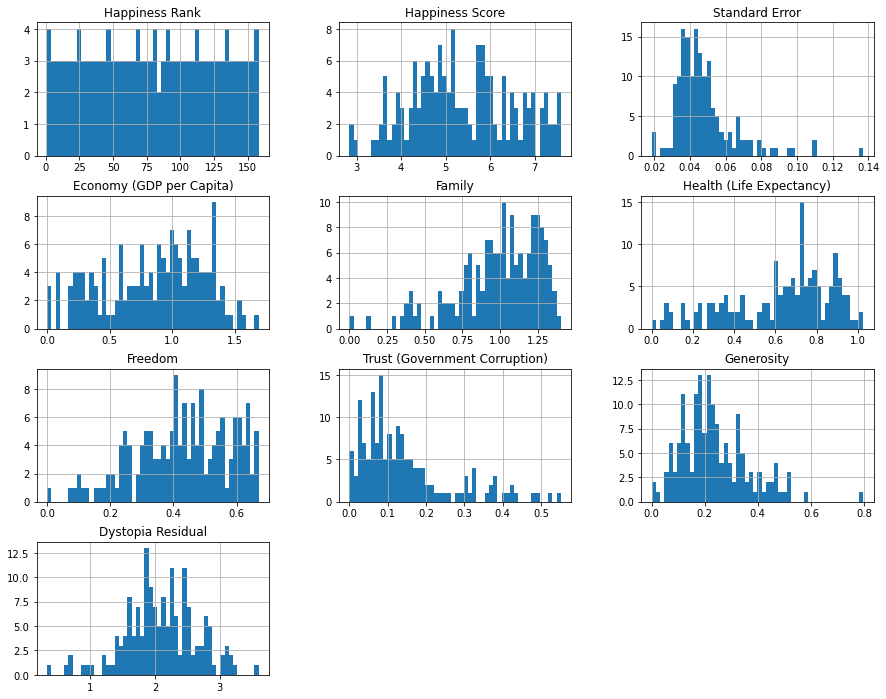

In [12]:
world_happiness_report.hist(bins=50, figsize=(15, 12))

In [13]:
world_happiness_report['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [33]:
world_happiness_report.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [35]:
world_happiness_report.shape

(158, 12)

In [36]:
world_happiness_report.isna().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
GDP                  0
Family               0
Life                 0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [38]:
for col in world_happiness_report.select_dtypes(object):
    print(col,world_happiness_report[col].nunique())

Country 158
Region 10


<AxesSubplot:>

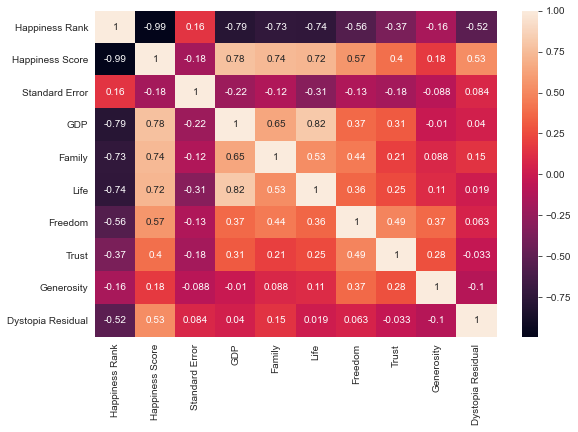

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
corr = world_happiness_report.corr()
sns.heatmap(corr, annot=True)

In [43]:
df1 = world_happiness_report.copy()
df1.drop(["Happiness Rank", "Country"], axis=1, inplace=True)

In [44]:
dummies = pd.get_dummies(df1)
dummies.head()

,Happiness Score,Standard Error,GDP,Family,Life,Freedom,Trust,Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,1
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,1
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,1
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,1
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0,0


In [47]:
sc = StandardScaler()

X = dummies.drop("Happiness Score", axis=1)
y = dummies["Happiness Score"]

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [52]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   SVM (Linear Kernel)": SVR(kernel="linear"),
}

In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   SVM (Linear Kernel) trained.


In [54]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')

                     Linear Regression
------------------------------------------------------------
Testing Accuracy: 1.00000
Training Accuracy: 1.00000
------------------------------------------------------------


 Linear Regression (L2 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.99991
Training Accuracy: 0.99994
------------------------------------------------------------


 Linear Regression (L1 Regularization)
------------------------------------------------------------
Testing Accuracy: -0.07232
Training Accuracy: 0.00000
------------------------------------------------------------


                   SVM (Linear Kernel)
------------------------------------------------------------
Testing Accuracy: 0.99542
Training Accuracy: 0.99717
------------------------------------------------------------




In [55]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=10))
    print("-----------------------------------------------------")

                     Linear Regression 

[0.99999971 0.99999997 0.9999998  0.99999994 0.99999998 0.99999991
 0.99999969 0.99999975 0.99999995 0.99999983]
-----------------------------------------------------
 Linear Regression (L2 Regularization) 

[0.98920331 0.99892142 0.99861532 0.99514169 0.99941341 0.99904286
 0.99831674 0.99951075 0.97386888 0.99657299]
-----------------------------------------------------
 Linear Regression (L1 Regularization) 

[-2.06857642e-01 -1.52617788e-02 -2.75037788e-01 -1.13273727e+00
 -1.82580412e-02 -5.29827282e-01 -4.84915004e-02 -5.31003501e-04
 -2.92257288e+00 -7.01287796e-02]
-----------------------------------------------------
                   SVM (Linear Kernel) 

[0.96170406 0.99423403 0.96540623 0.98004548 0.99893909 0.99724741
 0.9896013  0.99673999 0.8507072  0.98742604]
-----------------------------------------------------


C:\Users\nams1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nams1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


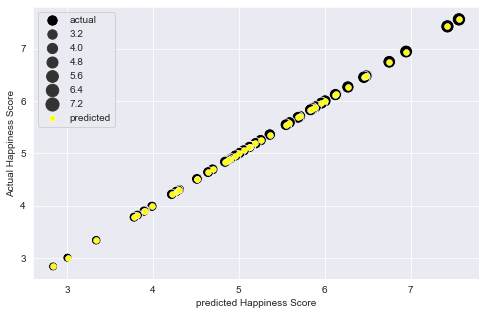

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.scatterplot(y_test, y_test, color="black", size=dummies["Happiness Score"], sizes=(80,180), label= "actual")
sns.scatterplot(lr.predict(X_test) ,y_test, color= "yellow", label="predicted")
plt.ylabel("Actual Happiness Score")
plt.xlabel("predicted Happiness Score")
plt.legend()

C:\Users\nams1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nams1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Generosity and Dystopian Residual')

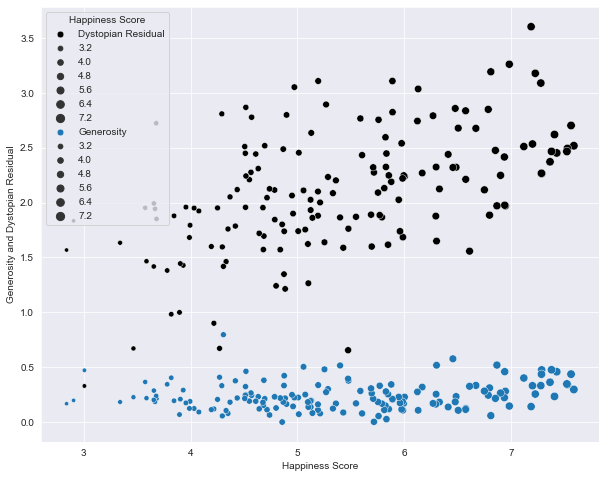

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(dummies["Happiness Score"], dummies["Dystopia Residual"], label = "Dystopian Residual",
                color="black", size=dummies["Happiness Score"])
sns.scatterplot(dummies["Happiness Score"], dummies["Generosity"], label = "Generosity",size=dummies["Happiness Score"])
plt.ylabel("Generosity and Dystopian Residual")

C:\Users\nams1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

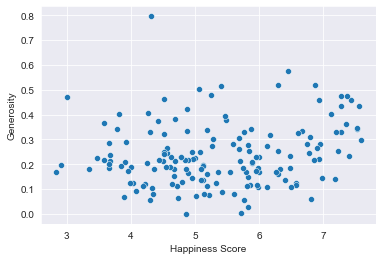

In [58]:
sns.scatterplot(dummies["Happiness Score"], dummies["Generosity"])